# Работа с Excel

## Лабораторная работа 7.1

1. Загрузите данные из файлов `reviews_sample.csv` (__ЛР2__) и `recipes_sample.csv` (__ЛР5__) в виде `pd.DataFrame`. Обратите внимание на корректное считывание столбца(ов) с индексами. Оставьте в таблице с рецептами следующие столбцы: `id`, `name`, `minutes`, `submitted`, `description`, `n_ingredients`

In [39]:
import pandas as pd
from pandas import ExcelWriter

In [40]:
import xlwings as xw

In [41]:
recipes = pd.read_csv('recipes_sample.csv', usecols=['id','name','minutes','submitted','description','n_ingredients'], index_col='id')
reviews = pd.read_csv('reviews_sample.csv', index_col=0)

2. Случайным образом выберите 5% строк из каждой таблицы и сохраните две таблицы на разные листы в один файл `recipes.xlsx`. Дайте листам названия "Рецепты" и "Отзывы", соответствующие содержанию таблиц. 

In [42]:
book = ExcelWriter('recipes.xlsx')

recipes = recipes.sample(frac=0.05)
reviews = reviews.sample(frac=0.05)

recipes.to_excel(book,'Рецепты')
reviews.to_excel(book,'Отзывы')
book.save()

3. Используя `xlwings`, добавьте на лист `Рецепты` столбец `seconds_assign`, показывающий время выполнения рецепта в секундах. Выполните задание при помощи присваивания массива значений диапазону ячеек.

In [43]:
df = pd.read_excel('recipes.xlsx', sheet_name='Рецепты')

df['seconds_assign'] = df['minutes']*60

book = xw.Book('recipes.xlsx')
rec = book.sheets['Рецепты']

rec.range('G1').value = 'seconds_assign'
rec.range('G2').value = df['seconds_assign'].values.reshape(-1, 1)

book.save()


4. Используя `xlwings`, добавьте на лист `Рецепты` столбец `seconds_formula`, показывающий время выполнения рецепта в секундах. Выполните задание при помощи формул Excel.

In [44]:
book = xw.Book('recipes.xlsx')
rec = book.sheets['Рецепты']

rec.range('H1').value = 'seconds_formula'
rec.range('H2').formula = '=C2*60'
last_row = rec.range('B' + str(rec.cells.last_cell.row)).end('up').row
rec.range('H2:H' + str(last_row)).formula = '=C2*60'

book.save()

5. Сделайте названия всех добавленных столбцов полужирными и выровняйте по центру ячейки.

In [45]:
book = xw.Book('recipes.xlsx')
book.sheets[0].range('A1').expand('right').font.bold = True
book.sheets[0].range('A1').expand('right').HorizontalAlignment= 1

book.save()

6. Раскрасьте ячейки столбца `minutes` в соответствии со следующим правилом: если рецепт выполняется быстрее 5 минут, то цвет - зеленый; от 5 до 10 минут - жёлтый; и больше 10 - красный.

In [49]:
book = xw.Book('recipes.xlsx')
rec = book.sheets['Рецепты']

minutes = rec.range('C2:C1501')
for cell in minutes:
    if cell.value < 5:
        cell.color = (146, 208, 80)
    elif 5 <= cell.value < 10:
        cell.color = (255, 255, 0)
    else:
        cell.color = (255, 0, 0) 
book.save()
book.close()

7. Добавьте на лист `Рецепты`  столбец `n_reviews`, содержащий кол-во отзывов для этого рецепта. Выполните задание при помощи формул Excel.

In [47]:
book = xw.Book('recipes.xlsx')
rec = book.sheets['Рецепты']
rev = book.sheets['Отзывы']

rec.range('I1').value = 'n_reviews'
rec.range('I2:I1501').formula = '=COUNTIFS(Отзывы!C:C, Рецепты!A2)'

book.save()
book.close()

## Лабораторная работа 7.2

8. Напишите функцию `validate()`, которая проверяет соответствие всех строк из листа `Отзывы` следующим правилам:
    * Рейтинг - это число от 0 до 5 включительно
    * Соответствующий рецепт имеется на листе `Рецепты`
    
В случае несоответствия этим правилам, выделите строку красным цветом

In [50]:
import xlwings as xw
import pandas as pd

def validate():
    book = xw.Book('recipes.xlsx')
    rec = book.sheets['Рецепты']
    rev = book.sheets['Отзывы']
    
#сделать массив с айди рецептов из листа с рецептами, 
#такой же массив из отзывов, потом соотнести элемент массива отзывы и массив
#рецепты и обращаясь через индекс,покрасить её в красный если элемента там нет
    
    massive_recipe_id = pd.read_excel('recipes.xlsx', sheet_name='Рецепты', header = 0,usecols='A:A')
    massive_review_id = pd.read_excel('recipes.xlsx', sheet_name='Отзывы', usecols='C:C')

    for i in range(2,len(rec.range('A1').expand('down'))):
        rating = rev.range('E' + str(i)).value
        recipe_id = rev.range('C' + str(i)).value
        
        if rating is None or not (0 <= rating <= 5):
            rev.range(f'{i}:{i}').color = (255,0,0)
            
        for j in range(0,len(massive_review_id)):
            if int(massive_review_id.loc[j]) not in massive_recipe_id:
                rev.range(f'{i}:{i}').color = (255,0,0)
                break

            
    book.save()

validate()

9. В файле `recipes_model.csv` находится модель данных предметной области "рецепты". При помощи пакета `csv` считайте эти данные. При помощи пакета `xlwings` запишите данные на лист `Модель` книги `recipes_model.xlsx`, начиная с ячейки `A2`, не используя циклы. Сделайте скриншот текущего состояния листа и прикрепите в ячейку ноутбука. 

In [2]:
import xlwings as xw
import csv
import pandas as pd

df = pd.read_csv('recipes_model.csv', sep='\t',header=None)
 
writer = pd.ExcelWriter('recipes_model.xlsx')
df.to_excel(writer, sheet_name='Модель', header='False', index=False)
 
writer.save()


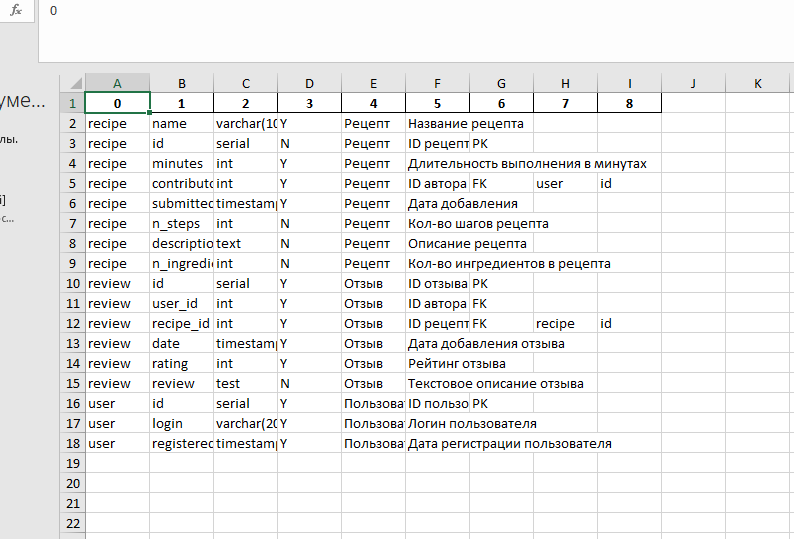

10. При помощи пакета `xlwings` добавьте в столбец J формулу для описания столбца на языке SQL. Формула должна реализовывать следующую логику:

    1\. в начале строки идут значения из столбцов В и C (значение столбца С приведено к верхнему регистру), разделенные пробелом
    
    2\. далее идут слова на основе столбца "Ключ"
        2.1 если в столбце "Ключ" указано значение "PK", то дальше через пробел идет ключевое слово "PRIMARY KEY"
        2.2 если в столбце "Ключ" указано значение "FK", то дальше через пробел идет ключевое слово "REFERENCES", затем значения столбцов H и I в формате "название_таблицы(название_столбца)"
        
    3\. если в столбце "Обязательно к заполнению" указано значение "Y" и в столбце "Ключ" указано не "PK", то дальше через пробел идет ключевое слово "NOT NULL".

Заполните этой формулой необходимое количество строк, используя "протягивание". Количество строк для протягивания определите на основе данных.

Сделайте скриншот текущего состояния листа и прикрепите в ячейку ноутбука.

In [3]:
import xlwings as xw
from xlwings.constants import AutoFillType

book = xw.Book('recipes_model.xlsx')
sheet = book.sheets['Модель']
num_rows = sheet.range('B:B').end('down').row - 1
formula = f'=B2 & " " & UPPER(C2) & IF(D2="PK", " PRIMARY KEY", IF(D2="FK", " REFERENCES " & H2 & "(" & I2 & ")", IF(D2<>"PK" & F2="Y", " NOT NULL", "")))'
sheet.range('J2').value = formula
sheet.range(f'J2:J{num_rows+1}').api.AutoFill(sheet.range(f'J2:J{num_rows+1}').api, 0)
book.save()

com_error: (-2147352567, 'Ошибка.', (0, 'Microsoft Excel', 'Метод AutoFill из класса Range завершен неверно', 'xlmain11.chm', 0, -2146827284), None)

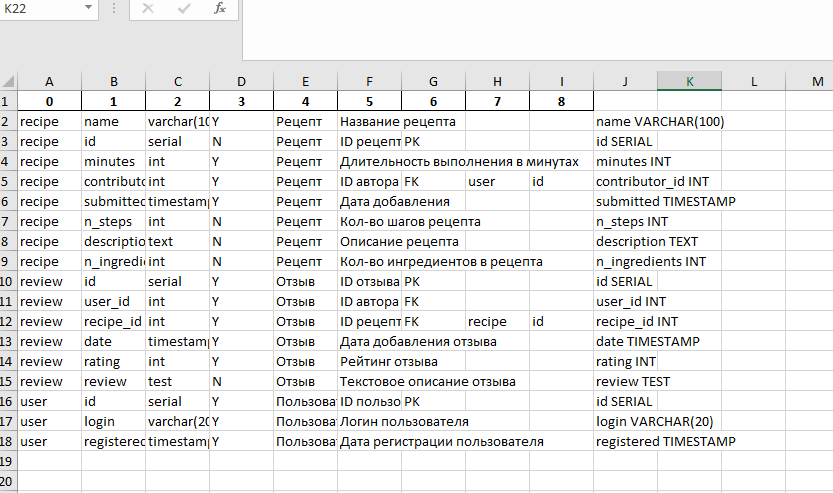

11. При помощи пакета `xlwings` измените стилизацию листа `Модель`.
* для заголовков добавьте заливку цвета `00ccff`
* примените автоподбор ширины столбца;
* сделайте шрифт заголовков полужирным;
* добавьте таблице автофильтр.

Сделайте скриншот текущего состояния листа и прикрепите в ячейку ноутбука.

In [6]:
import xlwings as xw

wb = xw.Book("recipes_model.xlsx")
sheet = wb.sheets["Модель"]

sheet['A1:J1'].color = (0,80,100)
sheet['A1:J1'].api.Font.Bold = True
sheet['A1:J20'].autofit()

table_range = sheet.range("A1:J20")  
table_range.api.AutoFilter()  

wb.save()


com_error: (-2147352567, 'Ошибка.', (0, 'Microsoft Excel', 'Метод AutoFilter из класса Range завершен неверно', 'xlmain11.chm', 0, -2146827284), None)

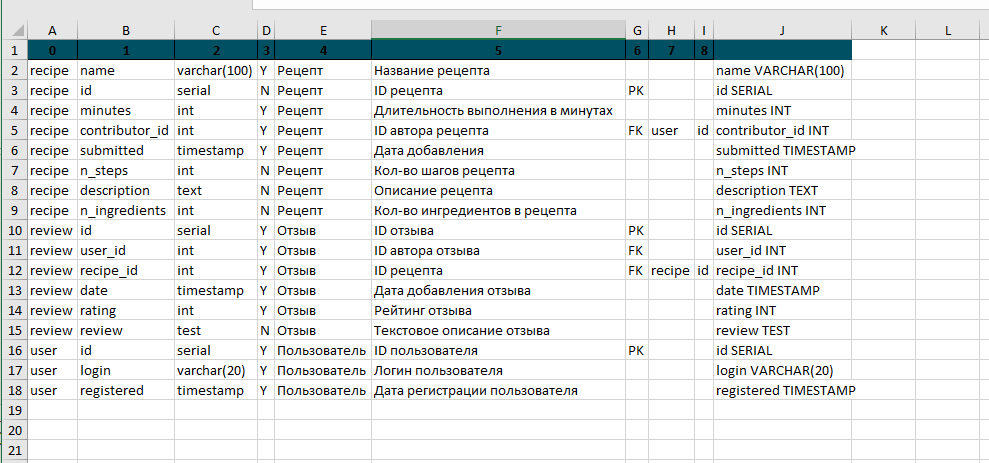

12. Посчитайте количество атрибутов для каждой из сущностей. Создайте лист `Статистика` и запишите в него результат группировки, начиная с ячейки "А1". Визуализируйте полученный результат при помощи столбчатой диаграммы. Сохраните полученную визуализацию на лист `Статистика`, начиная с ячейки "E2".  Сделайте скриншот листа `Статистика` и прикрепите в ячейку ноутбука.

* Вы можете воспользоваться методами для визуализации, которые поставляются вместе с объектами `pandas` (см. https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot) 